In [12]:
import scipy
import itertools as it
import scipy.stats
import numpy as np
import pandas as pd
from framework.data import sql
from framework.draw import *
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_sql('''
select
  `Primary specialty`,
  `Graduation year`,
  `Total Performance Score`
from hospital_practitioners
''', sql)

In [7]:
df.groupby('Primary specialty').groups.keys()

dict_keys(['CHIROPRACTIC', 'EMERGENCY MEDICINE', 'GERIATRIC MEDICINE', 'PLASTIC AND RECONSTRUCTIVE SURGERY', 'UROLOGY', 'NEPHROLOGY', 'PHYSICAL MEDICINE AND REHABILITATION', 'PERIPHERAL VASCULAR DISEASE', 'DERMATOLOGY', 'GENERAL SURGERY', 'PULMONARY DISEASE', 'CERTIFIED NURSE MIDWIFE', 'RHEUMATOLOGY', 'CARDIAC SURGERY', 'CRITICAL CARE (INTENSIVISTS)', 'PEDIATRIC MEDICINE', 'GENERAL PRACTICE', 'NURSE PRACTITIONER', 'UNDEFINED NON-PHYSICIAN TYPE (SPECIFY)', 'RADIATION ONCOLOGY', 'AUDIOLOGIST', 'PAIN MANAGEMENT', 'CLINICAL NURSE SPECIALIST', 'CARDIAC ELECTROPHYSIOLOGY', 'CLINICAL PSYCHOLOGIST', 'COLORECTAL SURGERY (PROCTOLOGY)', 'REGISTERED DIETITIAN OR NUTRITION PROFESSIONAL', 'INTERVENTIONAL PAIN MANAGEMENT', 'PODIATRY', 'OTOLARYNGOLOGY', 'PATHOLOGY', 'HOSPICE/PALLIATIVE CARE', 'GYNECOLOGICAL ONCOLOGY', 'CARDIOVASCULAR DISEASE (CARDIOLOGY)', 'ENDOCRINOLOGY', 'UNDEFINED PHYSICIAN TYPE (SPECIFY)', 'ANESTHESIOLOGY', 'SPORTS MEDICINE', 'ORAL SURGERY (DENTIST ONLY)', 'CLINICAL SOCIAL WORKER'

In [8]:
df.columns

Index(['Primary specialty', 'Graduation year', 'Total Performance Score'], dtype='object')

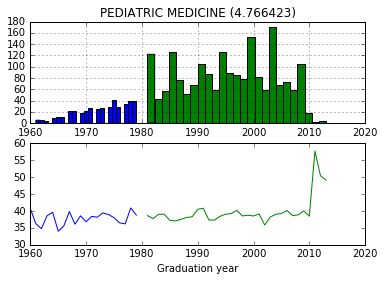

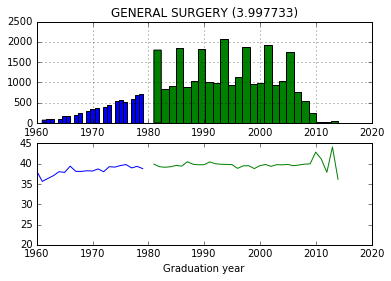

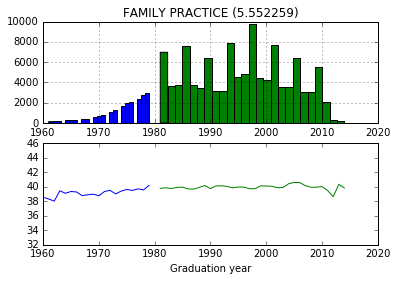

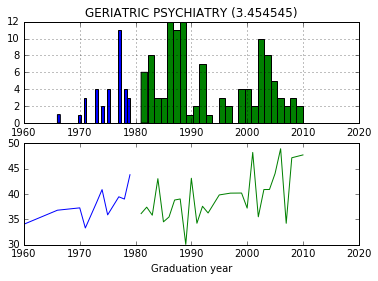

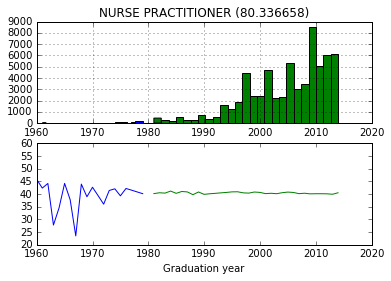

In [9]:
g = df.groupby('Primary specialty').groups
for specialty in ['PEDIATRIC MEDICINE',
                  'GENERAL SURGERY',
                  'FAMILY PRACTICE',
                  'GERIATRIC PSYCHIATRY',
                  'NURSE PRACTITIONER']:
    D = df.ix[g[specialty]]
    d = D['Graduation year'][D['Graduation year']>1960]
    plt.clf()
    plt.subplot(211)
    plt.title('%s (%f)' % (specialty, len(d[d>1980])/len(d[d<1980])))
    d[d<1980].hist(bins=25)
    d[d>1980].hist(bins=25)
    plt.subplot(212)
    D[D['Graduation year']<1980].groupby('Graduation year')['Total Performance Score'].mean().plot(xlim=[1960,2020])
    D[D['Graduation year']>1980].groupby('Graduation year')['Total Performance Score'].mean().plot(xlim=[1960,2020])
    plt.show()

In [11]:
f = open('specialty_correlations.csv', 'w')
print('Specialty 1,Specialty 2,Spearman Correlation,Spearman PValue', file=f)
for s1, s2 in it.combinations(g.keys(), 2):
    D1, D2 = df.ix[g[s1]], df.ix[g[s2]]
    d1 = D1[D1['Graduation year']>1950]['Graduation year']
    d2 = D2[D2['Graduation year']>1950]['Graduation year']
    dd1 = np.histogram(d1, range(1950, 2020, 2))
    dd2 = np.histogram(d2, range(1950, 2020, 2))
    s = scipy.stats.stats.spearmanr(dd1[0], dd2[0])
    print(s1,
          s2,
          '%0.3f' % (s.correlation),
          '%0.5f' % (s.pvalue),
          sep=',', file=f)
    f.flush()
f.close()

In [14]:
df.groupby('Primary specialty').groups.keys()

dict_keys(['CHIROPRACTIC', 'EMERGENCY MEDICINE', 'GERIATRIC MEDICINE', 'PLASTIC AND RECONSTRUCTIVE SURGERY', 'UROLOGY', 'NEPHROLOGY', 'PHYSICAL MEDICINE AND REHABILITATION', 'PERIPHERAL VASCULAR DISEASE', 'DERMATOLOGY', 'GENERAL SURGERY', 'PULMONARY DISEASE', 'CERTIFIED NURSE MIDWIFE', 'RHEUMATOLOGY', 'CARDIAC SURGERY', 'CRITICAL CARE (INTENSIVISTS)', 'PEDIATRIC MEDICINE', 'GENERAL PRACTICE', 'NURSE PRACTITIONER', 'UNDEFINED NON-PHYSICIAN TYPE (SPECIFY)', 'RADIATION ONCOLOGY', 'AUDIOLOGIST', 'PAIN MANAGEMENT', 'CLINICAL NURSE SPECIALIST', 'CARDIAC ELECTROPHYSIOLOGY', 'CLINICAL PSYCHOLOGIST', 'COLORECTAL SURGERY (PROCTOLOGY)', 'REGISTERED DIETITIAN OR NUTRITION PROFESSIONAL', 'INTERVENTIONAL PAIN MANAGEMENT', 'PODIATRY', 'OTOLARYNGOLOGY', 'PATHOLOGY', 'HOSPICE/PALLIATIVE CARE', 'GYNECOLOGICAL ONCOLOGY', 'CARDIOVASCULAR DISEASE (CARDIOLOGY)', 'ENDOCRINOLOGY', 'UNDEFINED PHYSICIAN TYPE (SPECIFY)', 'ANESTHESIOLOGY', 'SPORTS MEDICINE', 'ORAL SURGERY (DENTIST ONLY)', 'CLINICAL SOCIAL WORKER'

In [20]:
df = pd.read_sql('''
select `Primary specialty`, `Graduation year`, avg(`Total Performance Score`)
from hospital_practitioners
group by `Primary specialty`, `Graduation year`
''', con)

In [25]:
d = df.pivot('Primary specialty', 'Graduation year', 'avg(`Total Performance Score`)')
d.to_csv('out2.tsv', sep='\t')